<a href="https://colab.research.google.com/github/rkuma18/FMP/blob/main/Maths_support.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import basic library and package***

Import all the required package.

Pandas_profiling extends the general data frame report using a single line of code: df.profile_report() which interactively describes the statistics

*Run the below pip command when we start the notework*

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
! pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=UserWarning)
import pandas_profiling as pp
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from wordcloud import WordCloud
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from plotly import graph_objects
from plotly.subplots import make_subplots
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
import scipy.stats as stats
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# ***Pre-Processing and Cleaning***

***Maths Support Service (2020 - 2021)***

Load the Maths Support Service data of 20-21 years to data-frame 'df'
and print head

In [ ]:
df = pd.read_excel('Maths20_21.xlsx',index_col = None)
df.head()

Student ID  Gender Ethnic minority?  Year of birth       Date        Day  \
0        NaN    Male               No         1994.0 2020-12-10   Thursday   
1        NaN    Male              NaN         1997.0 2020-11-25  Wednesday   
2        NaN  Female               No         1997.0 2020-12-16  Wednesday   
3         \n  Female               No         1999.0 2020-12-09  Wednesday   
4        NaN  Female               No         1999.0 2020-12-08    Tuesday   

              Home School     Level  First time  \
0              Bioscience  UG Year 1         NO   
1  Business and Economics  UG Year 4        YES   
2             Mathematics  UG Year 3         NO   
3             Mathematics        MSc        YES   
4              Bioscience  UG Year 3        YES   

                       Topic (optional)  New Student ID  
0                            Statistics               1  
1  EVIEWS SOFTWARE and Panel Regression               2  
2                    Asymptotic Methods               3  
3                            Statistics               4  
4               Algebraic Manipulations               5

In [ ]:
df.shape #dimensionality of the DataFrame

(267, 11)

Drop the first column, ***Student ID*** from the data frame which is not of much use in my analysis because I have inserted a new column ***New Student ID***

In [ ]:
df = df.drop('Student ID', axis=1) #Remove columns by specifying label names and corresponding axis

In [ ]:
df.shape #dimensionality of the DataFrame after dropping 'Student ID' column

(267, 10)

***First major constraint of this research.***

My research focuses on Equality, diversity, and Inclusion. So, the relevant column in the dataset of this dataset is ***Gender, Ethnic minority,*** and ***Year of Birth***

I dropped all rows that have a NULL value in all three columns. I did it because two columns are categorical columns and one is numeric. If I were using the industry standard to impute the null value, I would have inserted a bias in the data.
Therefore, I removed the rows from the data set.


In [ ]:
df = df.dropna(subset=['Gender', 'Ethnic minority?','Year of birth'], how='all') #Drop the rows where all elements are missing from 'Gender', 'Ethnic minority?','Year of birth'

In [ ]:
df.shape #dimensionality of the DataFrame after NULL value from three columns # we lost 16.86% of data

(222, 10)

Pandas_profiling extends the general data frame report using a single line of code: **pp.ProfileReport(df)** which interactively describes the statistics

In [ ]:
profile = pp.ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Save the output file in html format: and share as a webpage
profile.to_file(output_file='Math_support_20-21.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

***Validation Data set for Statstics questions***

* That data set was constructed by me. Because I have to work with the students who have asked questions related to statistics and under this umbrella.
In this dataset, I have constructed two columns "Statistics_Analysis" and "Not Required".

* Load the dataset and display few rows

In [ ]:
val_df = pd.read_excel('validation_data.xlsx')
val_df.head()

Statistics_Analysis               Not Required
0  EVIEWS SOFTWARE and Panel Regression    Algebraic Manipulations
1                            Statistics                      LaTeX
2           Statistics for dissertation  Generalised linear models
3                  Weighted trend lines       Mathematical Physics
4          Statistics and data analysis         Probability theory

In [ ]:
val_df.shape #dimensionality of the DataFrame

(175, 2)

Extract all the students who have asked questions from the statistics umbrella and store them in the new data frame.

In [ ]:
math_20_21 = df[df['Topic (optional)'].isin(val_df['Statistics_Analysis'])]
math_20_21.head()

Gender Ethnic minority?  Year of birth       Date        Day  \
0    Male               No         1994.0 2020-12-10   Thursday   
1    Male              NaN         1997.0 2020-11-25  Wednesday   
2  Female               No         1997.0 2020-12-16  Wednesday   
3  Female               No         1999.0 2020-12-09  Wednesday   
7  Female              NaN         1998.0 2020-12-08    Tuesday   

              Home School     Level  First time  \
0              Bioscience  UG Year 1         NO   
1  Business and Economics  UG Year 4        YES   
2             Mathematics  UG Year 3         NO   
3             Mathematics        MSc        YES   
7                Pharmacy  UG Year 4         NO   

                       Topic (optional)  New Student ID  
0                            Statistics               1  
1  EVIEWS SOFTWARE and Panel Regression               2  
2                    Asymptotic Methods               3  
3                            Statistics               4  
7           Statistics for dissertation               7

In [ ]:
math_20_21.shape #Dimensionality of the DataFrame 

(78, 10)

* We lost 79.79% of data 
* It is a significant research requirement. 
* There are no workarounds to capture more data.

In [ ]:
#Check and drop NULL rows from the "Topic (optional)" column
math_20_21 = math_20_21.dropna(subset=['Topic (optional)'], how='all')

In [ ]:
#The final dataset we get after doing pre-processing and cleaning on math support data set 20-21
math_20_21.shape

(73, 10)

 * We have 27.34% of data from the original data set of math support 20-21 which satisfies our requirements 

In [ ]:
math_20_21['Year of birth'] = math_20_21['Year of birth'].astype(int) #change column type from float() to int()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
profile = pp.ProfileReport(math_20_21, title='Math support 20-21 Final', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

***Maths Support Service (2021 - 2022)***







Load the Maths Support Service data of 21-22 years to data-frame 'df1' and print head

In [ ]:
df1 = pd.read_excel('Maths21_22.xlsx')
df1.head()

Student ID Gender Ethnic minority?  Year of birth       Date      Day  \
0        NaN    NaN              NaN            NaN 2021-10-12  Tuesday   
1        NaN    NaN              NaN            NaN 2021-10-12  Tuesday   
2        NaN    NaN              NaN            NaN 2021-10-12  Tuesday   
3        NaN    NaN              NaN            NaN 2021-10-12  Tuesday   
4        NaN    NaN              NaN            NaN 2021-10-12  Tuesday   

              Home School     Level  First time     Topic (optional)  \
0        Computer Science        MSc        YES  Propositional logic   
1  Business and Economics        MSc         NO           Regression   
2             Mathematics  UG Year 1        YES           Regression   
3             Mathematics        MSc         NO           Set Theory   
4             Mathematics  UG Year 1         NO          Probability   

   New Student ID  
0             132  
1             133  
2             134  
3             135  
4             136

In [ ]:
df1.shape #dimensionality of the DataFrame

(161, 11)

Drop the first column, ***Student ID*** from the data frame which is not of much use in my analysis because I have inserted a new column ***New Student ID***

In [ ]:
df1 = df1.drop('Student ID', axis=1) #Remove columns by specifying label names and corresponding axis

In [ ]:
df1.shape

(161, 10)

***First major constraint of this research.***

My research focuses on Equality, diversity, and Inclusion. So, the relevant column in the dataset of this dataset is **Gender, Ethnic minority, and Year of Birth.**

I dropped all rows that have a **NULL** value in all three columns. I did it because two columns are categorical columns and one is numeric. If I were using the industry standard to impute the null value, I would have inserted a bias in the data. Therefore, I removed the rows from the data set.

In [ ]:
df1 = df1.dropna(subset=['Gender', 'Ethnic minority?','Year of birth'], how='all') #Drop the rows where all elements are missing from 'Gender', 'Ethnic minority?','Year of birth'

***Validation Data set for Statstics questions***

* That data set was constructed by me. Because I have to work with the students who have asked questions related to statistics and under this umbrella.
In this dataset, I have constructed two columns "Statistics_Analysis" and "Not Required".

* Load the dataset and display few rows

Extract all the students who have asked questions from the statistics umbrella and store them in the new data frame.

In [ ]:
math_21_22 = df1[df1['Topic (optional)'].isin(val_df['Statistics_Analysis'])]

In [ ]:
#Check and drop NULL rows from the "Topic (optional)" column
math_21_22 = math_21_22.dropna(subset=['Topic (optional)'], how='all')

In [ ]:
math_21_22['Year of birth'] = math_21_22['Year of birth'].astype(int) #change column type from float() to int()

In [ ]:
math_21_22.shape #The final dataset we get after doing pre-processing and cleaning on math support data set 20-21

(63, 10)

 * We have 39.13% of data from the original data set of math support 21-22 which satisfies our requirements 

**I need to merge the Math support of both datasets into a 'final_math' data frame. Because it will save time and space and carry out the operation more quickly.**

In [ ]:
final_maths = pd.concat([math_20_21, math_21_22],ignore_index=True)

In [ ]:
final_maths.shape #The final dataset we get after doing pre-processing and cleaning on math support data set 20-21 and 21-22

(136, 10)

 * We have 31.7% of data from the original data set of math support 20-21 and 21-22 which satisfies our requirements 

In [ ]:
today_year = 2022 #initialize the current year
final_maths['Age'] = today_year - final_maths['Year of birth'] #This will current age of all student and add new column with the value age of all student

In [ ]:
profile = pp.ProfileReport(final_maths, title='Maths_Final', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Download the final_math csv file

In [ ]:
from google.colab import files

final_maths.to_csv('final_maths.csv',index=False, encoding = 'utf-8-sig', header=True) 
files.download('final_maths.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

***UG Data Clinic***

Load the UG Data Clinic 21-22 to data-frame 'Bio' and print head

In [ ]:
Bio = pd.read_excel('Bioscience.xlsx')
Bio.head()

Student ID  Gender  Ethnic minority?  Year of birth       Date       Day  \
0           1  Female               NaN           2003 2021-11-30   Tuesday   
1           2    Male               NaN           1986 2021-12-02  Thursday   
2           2    Male               NaN           1986 2021-12-07   Tuesday   
3           2    Male               NaN           1986 2022-02-11    Friday   
4           2    Male               NaN           1986 2022-02-15   Tuesday   

        Level Course Start date               Topic (optional)  \
0  UG Level 1        2021-09-27   Statistics and data analysis   
1  UG Level 1        2021-09-27   Statistics and data analysis   
2  UG Level 1        2021-09-27   Statistics and data analysis   
3  UG Level 1        2021-09-27  Data exploration and graphing   
4  UG Level 1        2021-09-27   Statistics and data analysis   

                                           Questions   Outcome  \
0                     It is about statistical tests.  Resolved   
1  correlation queries on deciding the best resul...  Resolved   
2  Interpreting statistical figures and checking ...  Resolved   
3  Weighing up the value of different methods of ...  Resolved   
4  Understanding of chi-squared test and also of ...  Resolved   

                                            Feedback    Course Start Time  \
0  The session show me the difference between the...  UFBSBMSG   11:42:53   
1  I found this a very efficient way of asking fo...  UFBSBSCA   15:17:00   
2  This was a very helpful resource and has helpe...  UFBSBSCA   12:05:00   
3  My questions were answered clearly and also en...  UFBSBSCA   11:13:00   
4  Dr Kay, myself and another student had a very ...  UFBSBSCA   12:06:12   

   End Time  Query Duration  
0  12:15:02              20  
1  15:21:00              15  
2  12:09:00              40  
3  11:20:00              30  
4  12:14:17              60

***Validation Data set for Statstics questions***

* That data set was constructed by me. Because I have to work with the students who have asked questions related to statistics and under this umbrella.
In this dataset, I have constructed two columns "Statistics_Analysis" and "Not Required".

* Load the dataset and display few rows

Extract all the students who have asked questions from the statistics umbrella and store them in the new data frame.

In [ ]:
Bio_val = Bio[Bio['Topic (optional)'].isin(val_df['Statistics_Analysis'])]


In [ ]:
Bio_val['Year of birth'] = Bio_val['Year of birth'].astype(int) #change column type from float() to int()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
today_year = 2022 #initialize the current year
Bio_val['Age'] = today_year - Bio_val['Year of birth'] #This will give current age of all student and add new column with the value age of all student

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
profile = pp.ProfileReport(Bio_val, title='Bioscience Final', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
Bio_val.shape

(20, 17)

* We have 80% of data from the original data set of UG Data Clinic which satisfies our requirements 

In [ ]:
from google.colab import files

Bio_val.to_csv('Bio_val.csv',index=False, encoding = 'utf-8-sig', header=True) 
files.download('Bio_val.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ***Descriptive Analysis***

**Gender Ratio in Math Support**

In [ ]:
Gender_ratio_maths = final_maths.groupby("Gender")["Gender"].count()
print(Gender_ratio_maths)
fig = px.bar(Gender_ratio_maths)
fig.show()

Gender
Female    82
Male      54
Name: Gender, dtype: int64


**Ethnic Minority in Maths Support**

Ethnic minority?
No     89
Yes    27
Name: Ethnic minority?, dtype: int64


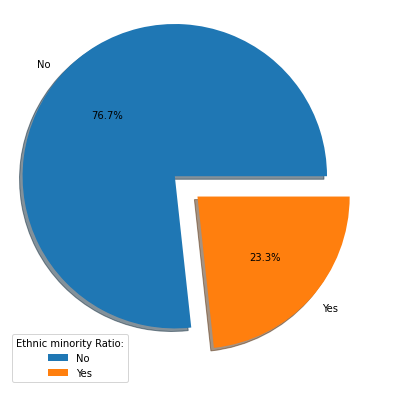

In [ ]:
minority_ratio_maths = final_maths.groupby("Ethnic minority?")["Ethnic minority?"].count()
print(minority_ratio_maths)

# Creating plot
fig = plt.figure(figsize =(10, 7))
mylabels = ["No", "Yes"]
myexplode = [0.2, 0]
plt.pie(minority_ratio_maths,labels = mylabels,explode = myexplode,shadow = True,autopct='%1.1f%%')
plt.legend(title = "Ethnic minority Ratio:")
# show plot
plt.show()

**Age Distribution in Maths Support**

In [ ]:
age_counts = final_maths["Age"].value_counts() #The method returns a pandas Series where the indices are the “Age” values, and the data points are the respective frequencies.
#We can pass this Series directly to Plotly and it is able to assign the ages and the frequencies to the correct dimension of the plot.
fig = px.bar(age_counts, title="Age of students")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

In [ ]:
year_counts = final_maths['Year of birth'].value_counts() #The method returns a pandas Series where the indices are the 'Year of birth' values, and the data points are the respective frequencies.
#We can pass this Series directly to Plotly and it is able to assign the years and the frequencies to the correct dimension of the plot.
fig = px.bar(year_counts, title="Students Year of birth")
fig.update_layout(
    xaxis_title = "Year",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

**The ratio of students in terms of Gender vs Ethnic minority**

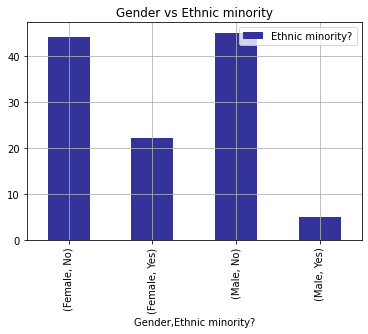

In [ ]:
final_maths.groupby(['Gender'])['Ethnic minority?'].value_counts().plot(kind='bar',title = 'Gender vs Ethnic minority',legend = True, colormap = 'terrain',grid=True) 

In [ ]:
crosstable=pd.crosstab(final_maths['Gender'],final_maths['Ethnic minority?'])
crosstable

Ethnic minority?  No  Yes
Gender                   
Female            44   22
Male              45    5

**Age distribution for Gender and Ethnic minority**

In [ ]:
final_maths.groupby(['Ethnic minority?','Gender'])['Age'].value_counts().plot(kind='bar',title = 'Gender vs Ethnic minority',legend = True, colormap = 'terrain',grid=True,figsize=(22,10)) 

In [ ]:
age_group = final_maths.groupby(['Ethnic minority?','Gender'])["Age"].value_counts()
age_group

Ethnic minority?  Gender  Age
No                Female  21     14
                          22     14
                          23      9
                          24      3
                          25      3
                          32      1
                  Male    22     24
                          23      5
                          24      4
                          28      2
                          29      2
                          19      1
                          20      1
                          21      1
                          26      1
                          27      1
                          30      1
                          32      1
                          33      1
Yes               Female  24      7
                          25      5
                          22      3
                          23      3
                          28      2
                          26      1
                          42      1
                  Male    21      

**From which Home school these students are coming to Math support, and how many are they**

In [ ]:
## dataframe creation - for plotting
# create new pandas dataframe which contains all counts filtered by 'Gender' == "Female" and sorted by Home School
Female_student_df = (
    final_maths.loc[final_maths['Gender'] == "Female"]
    .groupby(['Home School'])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=["Home School"])
)
# create new pandas dataframe which contains all counts filtered by 'Gender' == "Male" and sorted by Home School
Male_student_df = (
    final_maths.loc[final_maths["Gender"] == "Male"]
    .groupby(["Home School"])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=["Home School"])
)
# get unique values from the just created pandas dataframes and store them in an array
labels_female_student = Female_student_df["Home School"].unique()
labels_male_student = Male_student_df["Home School"].unique()
# get all the counts from the created pandas dataframes and store them in an array
values_female_student = Female_student_df["Counts"]
values_male_student = Male_student_df["Counts"]

In [ ]:
## Creating two pie charts
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]])
# create an array of colors which will be custom colors to the plot
earth_colors = [
    "rgb(210,180,140)",
    "rgb(218,165,32)",
    "rgb(139,69,19)",
    "rgb(175, 51, 21)",
    "rgb(35, 36, 21)",
    "rgb(188,143,143)",
]
# crate traces to specify the various properties of the first pie chart subplot
fig.add_trace(
    go.Pie(
        labels=labels_female_student,
        values=values_female_student,
        name="Female",
        marker_colors=earth_colors,
    ),
    1,
    1,
)
# crate traces to specify the various properties of the second pie chart subplot
fig.add_trace(
    go.Pie(
        labels=labels_male_student,
        values=values_male_student,
        name="Male",
        marker_colors=earth_colors,
    ),
    1,
    2,
)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=0.4, hoverinfo="label+percent+name")
# adapt layout of the chart for readability
fig.update_layout(
    title_text="Gender by Home School",
    # Add annotations in the center of the donut pies.
    annotations=[
        dict(text="Female", x=0.20, y=0.5, font_size=17, showarrow=False),
        dict(text="Male", x=0.79, y=0.5, font_size=17, showarrow=False),
    ],
)
fig.show()

In [ ]:
## dataframe creation - for plotting
df_combinations = (
    final_maths.groupby(["Gender", "Home School", "Ethnic minority?", "Age"])
    .size()
    .reset_index()
    .rename(columns={0: "count"})
)
## Creating sunburst chart
# define figure element
fig = px.sunburst(
    df_combinations,
    path=["Gender", "Ethnic minority?", "Age","Home School"],
    title="Home School - Gender, Ethnic minority, Age",
    color="Gender",
    color_discrete_sequence=["#87CEFA", "#6B8E23"],
    height=800,
)
# display the figure
fig.show()

**Amongst acquired EDI which topic are asked most and on which days**

In [ ]:
text = " ".join(i for i in final_maths['Topic (optional)'])
stopwords = list(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Topics in Math support")
plt.axis("off")
plt.show()

In [ ]:
fig = px.scatter(final_maths, x='Day', y='Topic (optional)', size='Age', color='Gender',hover_data=['Ethnic minority?'])
fig.show()

In [ ]:
## dataframe creation - for plotting
df_combination = (
    final_maths.groupby(['Ethnic minority?','Gender','Age','Topic (optional)','Day'])
    .size()
    .reset_index()
    .rename(columns={0: "count"})
)
## Creating sunburst chart
# define figure element
fig = px.sunburst(
    df_combination,
    path=["Gender", "Ethnic minority?", "Day","Topic (optional)"],
    title="Topic - Gender, Ethnic minority, Day",
    color="Gender",
    color_discrete_sequence=["#87CEFA", "#6B8E23"],
    height=800,
)
# display the figure
fig.show()

In [ ]:
day_group = final_maths.groupby(['Ethnic minority?','Gender','Age','Topic (optional)'])["Day"].value_counts()
day_group

Ethnic minority?  Gender  Age  Topic (optional)                      Day        
No                Female  21   Regression                            Wednesday      1
                               Statistical tests                     Wednesday      1
                               Statistics                            Thursday       2
                                                                     Wednesday      1
                               Statistics (F-test)                   Thursday am    1
                                                                                   ..
Yes               Male    21   Analysis                              Tuesday        1
                               Statistics and Probability            Wednesday      1
                          25   Statistical inference                 Tuesday        1
                          34   Statistics                            Tuesday        1
                          49   Statistics (Repeated Measure

**Maths Support - Both minority group student belongs to which level in University and which Home School**

In [ ]:
## dataframe creation - for plotting
# create new pandas dataframe which contains all counts filtered by 'Ethnic Minority?' == "Yes" and sorted by Level
yes_student_df = (
    final_maths.loc[final_maths['Ethnic minority?'] == "Yes"]
    .groupby(['Level '])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=["Level "])
)
# create new pandas dataframe which contains all counts filtered by 'Ethnic Minority?' == "No" and sorted by Level
no_student_df = (
    final_maths.loc[final_maths["Ethnic minority?"] == "No"]
    .groupby(['Level '])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=["Level "])
)
# get unique values from the just created pandas dataframes and store them in an array
labels_yes_student = yes_student_df['Level '].unique()
labels_no_student = no_student_df['Level '].unique()
# get all the counts from the created pandas dataframes and store them in an array
values_yes_student = yes_student_df["Counts"]
values_no_student = no_student_df["Counts"]

In [ ]:
## Creating two pie charts
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]])
# create an array of colors which will be custom colors to the plot
earth_colors = [
    "rgb(210,180,140)",
    "rgb(218,165,32)",
    "rgb(139,69,19)",
    "rgb(175, 51, 21)",
    "rgb(35, 36, 21)",
    "rgb(188,143,143)",
    "rgb(225,215,0)",
    "rgb(0,0,225)"
]
# create traces to specify the various properties of the first pie chart subplot
fig.add_trace(
    go.Pie(
        labels=labels_yes_student,
        values=values_yes_student,
        name="Yes",
        #marker_colors=earth_colors,
    ),
    1,
    1,
)
# create traces to specify the various properties of the second pie chart subplot
fig.add_trace(
    go.Pie(
        labels=labels_no_student,
        values=values_no_student,
        name="No",
        #marker_colors=earth_colors,
    ),
    1,
    2,
)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=0.4, hoverinfo="label+percent+name")
# adapt layout of the chart for readability
fig.update_layout(
    title_text="Ethnic minority by Level",
    # Add annotations in the center of the donut pies.
    annotations=[
        dict(text="Yes", x=0.20, y=0.5, font_size=17, showarrow=False),
        dict(text="No", x=0.79, y=0.5, font_size=17, showarrow=False),
    ],
)
fig.show()

In [ ]:
HomeSchool_group = final_maths.groupby(['Ethnic minority?','Level '])["Home School"].value_counts() #normalize=True
HomeSchool_group

Ethnic minority?  Level                        Home School           
No                MSc                          Business and Economics    11
                                               Computer Science           1
                                               Healthcare Science         1
                                               Mathematics                1
                  PhD                          Pharmacy                   2
                                               Business and Economics     1
                  UG Year 1                    Mathematics                3
                                               Bioscience                 2
                                               Optometry                  1
                                               Psychology                 1
                  UG Year 2                    Mathematics                4
                                               Bioscience                 2
                  

**Maths Support - A single student coming to take support belong to which gender and frequency of coming and minority equal to "YES"**

In [ ]:
ind_out = final_maths['Ethnic minority?'] == 'Yes'
#ind_out.value_counts()
final_edi = final_maths[ind_out]
stu_group = final_edi.groupby(['Gender'])["New Student ID"].value_counts()#normalize=True
stu_group

Gender  New Student ID
Female  137               4
        89                2
        166               2
        191               2
        234               2
        10                1
        70                1
        80                1
        83                1
        98                1
        99                1
        145               1
        176               1
        189               1
        198               1
Male    33                2
        14                1
        35                1
        91                1
Name: New Student ID, dtype: int64

**Maths Support - Frequency of students on particular days in Maths Support Serivce**

In [ ]:
## dataframe creation - for plotting
# create new pandas dataframe which contains all counts sorted by Day
days_df = (
    final_maths.groupby(['Day'])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=["Day"])
)

In [ ]:
## Creating a pie chart
# create labels using all unique values in the column named "Day"
labels = days_df['Day'].unique()
# group by count of the "Day" column.
values = days_df['Counts']
# Custom define a list of colors to be used for the pie chart.
# Note that the same number of colors are specified as there are unique Day. It is not mandatory, but
# will avoid a single color to be used multiple times.
earth_colors = [
    "rgb(210,180,140)",
    "rgb(218,165,32)",
    "rgb(139,69,19)",
    "rgb(175, 51, 21)",
    "rgb(35, 36, 21)",
    "rgb(188,143,143)",
    "rgb(255,0,0)"
]
# defining the actual figure using the dimension: Day
# Note that a pull keyword was specified to explode pie pieces out of the center
fig = go.Figure(
    data=[
        go.Pie(
            labels=labels,
            values=values,
            # pull is given as a fraction of the pie radius
            #pull=[0, 0, 0.07, 0.08, 0.02, 0.2],
            # iterate through earth_colors list to color individual pie pieces
            marker_colors=earth_colors,
        )
    ]
)
# Update layout to show a title
fig.update_layout(title_text="Service Day percentage")
# display the figure
fig.show()

**Maths Support - Gender ratio among online and in-person service**

In [ ]:
online = ['Tuesday ','Thursday','Wednesday','Tuesday am','Thursday am','Tuesday pm']
in_person = ['Thursday pm','Wednesday am']

In [ ]:
#ONLINE
ol = final_maths[final_maths['Day'].isin(online)]
off = final_maths[final_maths['Day'].isin(in_person)]

Gender_ratio_online = ol.groupby(['Day','Gender'])["Gender"].count()
print('Online')
Gender_ratio_online

Online


Day          Gender
Thursday     Female    15
             Male      13
Thursday am  Female     8
             Male       1
Tuesday am   Female    12
             Male       5
Tuesday pm   Female     4
             Male       1
Wednesday    Female    13
             Male      12
Name: Gender, dtype: int64

In [ ]:
#IN-PERSON
Gender_ratio_offline = off.groupby(['Day','Gender'])["Gender"].count()
print('Offline')
Gender_ratio_offline

Offline


Day          Gender
Thursday pm  Female    9
             Male      4
Name: Gender, dtype: int64

**Maths Support - Minorities students come on which day most and which age group they belong in Online session**


In [ ]:
#Minority = 'Yes'
ey = ol['Ethnic minority?'] == 'Yes'
ethnic_yes = ol[ey]

In [ ]:
ol.groupby('Day')["Age"].value_counts().plot(kind='bar',title = 'Day vs Age',legend = True, colormap = 'viridis',grid=True,figsize=(22,10)) 

In [ ]:
age_group = ol.groupby('Day')["Age"].value_counts()#normalize=True
age_group

Day          Age
Thursday     24     9
             22     5
             23     4
             25     3
             21     2
             26     1
             28     1
             29     1
             30     1
             49     1
Thursday am  22     3
             21     2
             23     2
             25     1
             26     1
Tuesday am   23     7
             22     6
             21     3
             24     1
Tuesday pm   22     3
             28     2
Wednesday    22     7
             21     5
             25     4
             23     3
             24     2
             19     1
             28     1
             29     1
             32     1
Name: Age, dtype: int64

**Maths Support -Gender ratio amongst which level prefer which days to take service**

In [ ]:
student_level = final_maths.groupby(['Level ','Day'])["Gender"].value_counts()#normalize=True
print(student_level)

Level                        Day          Gender
MSc                          Thursday     Male      4
                                          Female    1
                             Tuesday      Male      7
                                          Female    2
                             Tuesday pm   Female    1
                             Wednesday    Male      3
                                          Female    1
PhD                          Thursday     Male      1
                             Thursday am  Female    1
                             Tuesday      Female    1
                             Wednesday    Female    1
                                          Male      1
Preliminary/Foundation Year  Wednesday    Male      1
UG Year 1                    Thursday     Male      2
                             Thursday am  Female    1
                             Tuesday      Male      4
                                          Female    1
                             Wedn

***Gender ratio in UG Data Clinic***

In [ ]:
gender_ratio_bio = Bio_val.groupby("Gender")["Gender"].count()
print(gender_ratio_bio)
fig = px.bar(gender_ratio_bio)
fig.show()

Gender
Female    14
Male       6
Name: Gender, dtype: int64


**Age Distribution in UG Data Clinic**

In [ ]:
age_counts = Bio_val["Age"].value_counts() #The method returns a pandas Series where the indices are the “Age” values, and the data points are the respective frequencies.
#We can pass this Series directly to Plotly and it is able to assign the ages and the frequencies to the correct dimension of the plot.
fig = px.bar(age_counts, title="Age of students")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

In [ ]:
Year_counts = Bio_val["Year of birth"].value_counts() #The method returns a pandas Series where the indices are the “Year” values, and the data points are the respective frequencies.
#We can pass this Series directly to Plotly and it is able to assign the ages and the frequencies to the correct dimension of the plot.
fig = px.bar(Year_counts, title="Age of students")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

**Gender ratio amongst which level take service in UG Data Clinic**

In [ ]:
## dataframe creation - for plotting
# create new pandas dataframe which contains all counts filtered by 'Gender' == "Female" and sorted by Level
Female_student_df = (
    Bio_val.loc[Bio_val['Gender'] == "Female"]
    .groupby(['Level'])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=["Level"])
)
# create new pandas dataframe which contains all counts filtered by 'Gender' == "Male" and sorted by Level
Male_student_df = (
    Bio_val.loc[Bio_val["Gender"] == "Male"]
    .groupby(["Level"])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=["Level"])
)
# get unique values from the just created pandas dataframes and store them in an array
labels_female_student = Female_student_df["Level"].unique()
labels_male_student = Male_student_df["Level"].unique()
# get all the counts from the created pandas dataframes and store them in an array
values_female_student = Female_student_df["Counts"]
values_male_student = Male_student_df["Counts"]

In [ ]:
## Creating two pie charts
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]])
# create an array of colors which will be custom colors to the plot
earth_colors = [
    "rgb(210,180,140)",
    "rgb(218,165,32)"
]
# crate traces to specify the various properties of the first pie chart subplot
fig.add_trace(
    go.Pie(
        labels=labels_female_student,
        values=values_female_student,
        name="Female",
        marker_colors=earth_colors,
    ),
    1,
    1,
)
# crate traces to specify the various properties of the second pie chart subplot
fig.add_trace(
    go.Pie(
        labels=labels_male_student,
        values=values_male_student,
        name="Male",
        marker_colors=earth_colors,
    ),
    1,
    2,
)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=0.4, hoverinfo="label+percent+name")
# adapt layout of the chart for readability
fig.update_layout(
    title_text="Gender by Level",
    # Add annotations in the center of the donut pies.
    annotations=[
        dict(text="Female", x=0.20, y=0.5, font_size=17, showarrow=False),
        dict(text="Male", x=0.79, y=0.5, font_size=17, showarrow=False),
    ],
)
fig.show()

**Frequency of students on particular days in UG Data Clinic**

In [ ]:
## dataframe creation - for plotting
# create new pandas dataframe which contains all counts sorted by Day
dayss_df = (
    Bio_val.groupby(['Day'])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=["Day"])
)

In [ ]:
## Creating a pie chart
# create labels using all unique values in the column named "Day"
labels = dayss_df['Day'].unique()
# group by count of the "Day" column.
values = dayss_df['Counts']
# Custom define a list of colors to be used for the pie chart.
# Note that the same number of colors are specified as there are unique Day. It is not mandatory, but
# will avoid a single color to be used multiple times.
earth_colors = [
    "rgb(210,180,140)",
    "rgb(218,165,32)",
    "rgb(139,69,19)"
]
# defining the actual figure using the dimension: Day
# Note that a pull keyword was specified to explode pie pieces out of the center
fig = go.Figure(
    data=[
        go.Pie(
            labels=labels,
            values=values,
            # pull is given as a fraction of the pie radius
            #pull=[0, 0, 0.07, 0.08, 0.02, 0.2],
            # iterate through earth_colors list to color individual pie pieces
            marker_colors=earth_colors,
        )
    ]
)
# Update layout to show a title
fig.update_layout(title_text="Service Day percentage in UG Data Clinic")
# display the figure
fig.show()

**Overview of Feedback with help of word cloud**

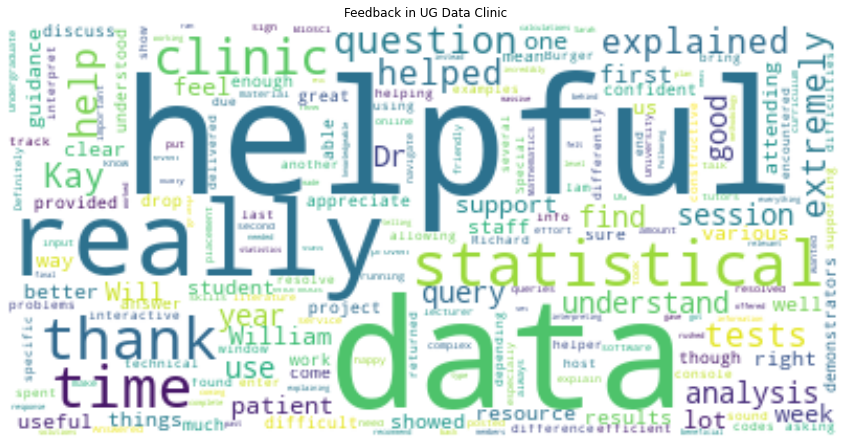

In [ ]:
texts = " ".join(i for i in Bio_val['Feedback'])
#stopwords = stopwords.words('english')
wordcloud = WordCloud( background_color="white").generate(texts)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Feedback in UG Data Clinic")
plt.axis("off")
plt.show()

**Students come on which day most and which age group they belong in Online session in UG Data Clinic**

In [ ]:
Bio_val.groupby('Day')["Age"].value_counts().plot(kind='bar',title = 'Day vs Age',legend = True, colormap = 'viridis',grid=True,figsize=(22,10)) 

**Gender ratio and frequency of these students of taking service in UG data clinic**

In [ ]:
stu_id_group = Bio_val.groupby(['Gender'])["Student ID"].value_counts()#normalize=True
stu_id_group

Gender  Student ID
Female  11            3
        4             2
        1             1
        6             1
        8             1
        9             1
        10            1
        12            1
        13            1
        14            1
        15            1
Male    2             3
        5             2
        3             1
Name: Student ID, dtype: int64

# **Inferential Analysis**

**Maths Support Gender vs Ethnic minority**

In [ ]:
chisqt = pd.crosstab(final_maths.Gender, final_maths['Ethnic minority?'], margins=True, margins_name="Total")
print(chisqt)

Ethnic minority?  No  Yes  Total
Gender                          
Female            44   22     66
Male              45    5     50
Total             89   27    116


In [ ]:
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

(8.673047579414622, 0.013081924775260085, 2)


From above, 0.01 is the p-value, 8.67 is the statistical value and 2 is the degree of freedom. As the p-value is smaller than 0.05, we reject the NULL hypothesis and assume that the variables ‘Gender’ and ‘Ethnic minority’ are dependent of each other.

**Maths Support Age vs Day**

In [ ]:
# create contingency table
data_crosstab = pd.crosstab(final_maths['Gender'],
                            final_maths['Day'],
                           margins=True, margins_name="Total")
# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = final_maths['Gender'].unique()
columns = final_maths['Day'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * chisqt['Total'][j] / chisqt['Total']['Total']
        chi_square += (O-E)**2/E


# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 7.468853422829894  and p value is: 0.2796529945578854
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 7.468853422829894  and critical value is: 12.591587243743977
Failed to reject the null hypothesis.


**Math Support Gender vs Age**

In [ ]:
# create contingency table
data_crosstab = pd.crosstab(final_maths['Gender'],
                            final_maths['Age'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = final_maths['Gender'].unique()
columns = final_maths['Age'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * chisqt['Total'][j] / chisqt['Total']['Total']
        chi_square += (O-E)**2/E


# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 32.70848820212149  and p value is: 0.008075733510830352
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 32.70848820212149  and critical value is: 26.29622760486423
Null Hypothesis is rejected.


**UG Data Clinic Gender vs Day**

In [ ]:
# create contingency table
data_crosstab = pd.crosstab(Bio_val['Gender'],
                            Bio_val['Day'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = Bio_val['Gender'].unique()
columns = Bio_val['Day'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * chisqt['Total'][j] / chisqt['Total']['Total']
        chi_square += (O-E)**2/E


# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 3.5131680440771347  and p value is: 0.17263357021781967
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 3.5131680440771347  and critical value is: 5.991464547107979
Failed to reject the null hypothesis.
